<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Práctica 1 - Grafos </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
<center><p><h2> ¡¡IMPORTANTE!! </h2></p> </center> 

<p>
Para la realización de esta práctica tendréis que utilizar la clase de grafos NetworkX y <b>NO</b> la clase `Graph` que implementasteis en la Práctica 0. Hay casos muy concretos que no contemplaban los tests y podría hacer que vuestros algoritmos no funcionen correctamente. NetworkX tiene una interfaz muy similar a la librería <i>Graph</i> que implementasteis la semana pasada. Para más información podéis consultar la documentación de la librería <a href="https://networkx.github.io/documentation/latest/reference/introduction.html">aquí.</a>
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>

A lo largo de esta práctica trabajaremos con el grafo generado a partir de la red de metro de Londres. En este grafo, los nodos representan las estaciones y las aristas las vias que van de una estación a otra. Todas las aristas tienen cuatro atributos:

* Linea
* Color
* Nombre (de la linea)
* Distancia

Los nodos contienen: 
* El nombre de la estación
* La latitud y longitud de la estación
* Número de lineas
* Zona


In [5]:
from util import get_subway_graph, draw_subway_graph
from networkx import nx

# Carga del grafo del metro con el que trabajaremos
G, lines = get_subway_graph('csv')

# Algunos nodos
print(list(G.nodes())[:20],'...')
# Algunas aristas
print(list(G.edges())[:20],'...')
print('\n')
print("Ejemplo de arista: ",G.edges[156,167])
print("Ejemplo de nodo: ",G.node[33])

[11, 163, 212, 49, 87, 197, 82, 193, 84, 148, 279, 113, 246, 298, 114, 140, 137, 206, 237, 143] ...
[(11, 163), (11, 212), (11, 83), (11, 104), (11, 28), (11, 249), (11, 94), (163, 82), (212, 192), (49, 87), (49, 197), (49, 151), (87, 279), (87, 255), (87, 285), (197, 192), (197, 107), (197, 151), (82, 193), (193, 278)] ...


Ejemplo de arista:  {'name': 'Metropolitan Line', 'color': '8b004c', 'stripe': 'NULL', 'line': 8, 'distance': 0.006350590523722737}
Ejemplo de nodo:  {'latitude': 51.5269, 'longitude': -0.0247, 'name': 'Bow Road', 'display_name': 'Bow<br />Road', 'zone': 2.0, 'total_lines': 2, 'rail': '0'}


Para más consultas, la información ha sido extraida de Wikimedia Commons:

https://commons.wikimedia.org/wiki/London_Underground_geographic_maps/CSV

# util.py

En este archivo se os facilitan varias funciones que os permitiran cargar y visualizar la red de metro.
```python
"""
Retorna un objeto nx.Graph que corresponde al grafo de la red de metro y un 
diccionario con las lineas del metro
 - location: ruta donde esta almacenado el archivo .csv
"""
G, lines = get_subway_graph(location)

"""
Dibuja el grafo que le pasemos por parametro.
- G: Grafo de la red de metro
- lines: diccionario con la información sobre las lineas del metro
- figsize: parametro opcional que nos permite definir el tamaño de la figura
- show_labels: parametro opcional que nos permite indicar si queremos mostrar los 
    nombres de las estaciones
"""
draw_subway_graph(G, lines, figsize=(10,6), show_labels=False)

```

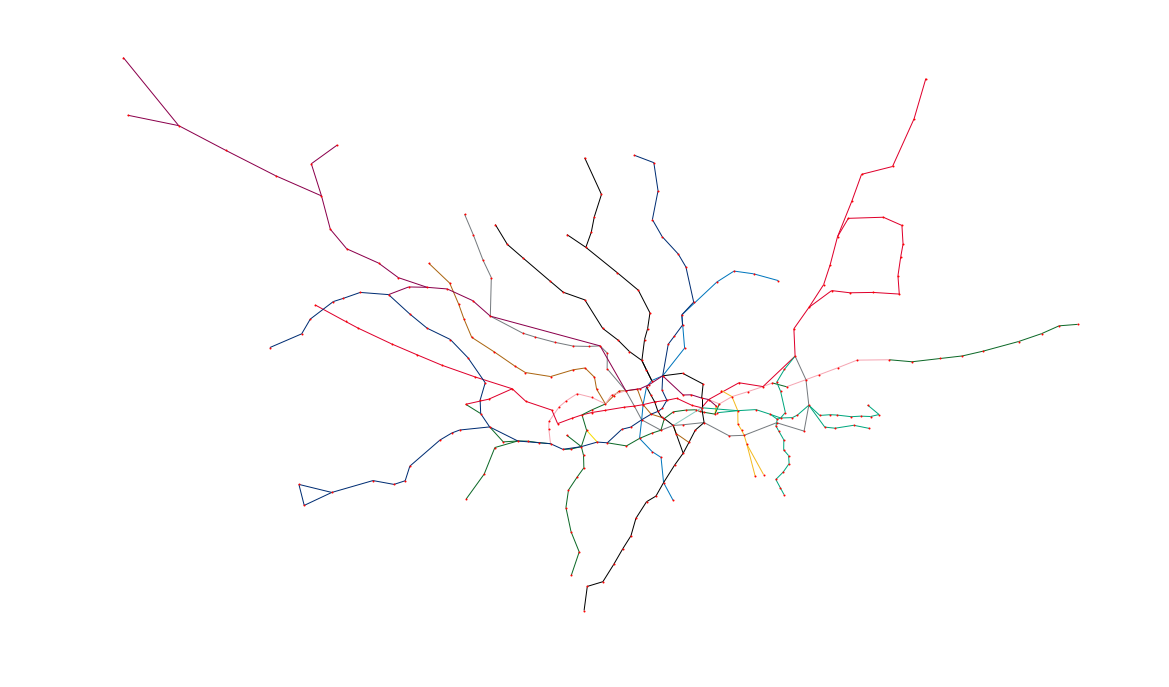

In [2]:
draw_subway_graph(G, lines, figsize=(20,12))

<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>



<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>1- Dijkstra</p></h2>
  <p>
 En esta segunda parte de la práctica se propone que implementéis el algoritmo <a href="https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm">Dijkstra</a> (explicado en teoría) para encontrar el camino más corto entre dos paradas de la red de metro de Londres.
</p>



<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto de tipo `nx.Graph`.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso, como indexamos los nodos con el identificador de las paradas de Metro, deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El indice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
<li>__infinity=*(int)*__: Parametro opcional en el que definimos que numero nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un <b>diccionario</b> que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final (ambos nodos, inicio y final, han de estar incluidos en esta lista).</li>
<li>__ _'expanded'_ __: El numero de nodos que se han visitado para encontrar la solución.</li>
<li>__ _'distance'_ __: La distancia del camino mínimo desde el origen hasta el destino (es decir, el valor del nodo destino).
<ul>

</p>
</div>


In [6]:
def dijkstra(G, origen, destino, infinity=2**32-1):
    
    for nodes in G.nodes():
        G.node[nodes]['parent']= None #Fem que tots els nodes no tinguin pare
        G.node[nodes]['distanciaTotal']= infinity #Fem que tots els nodes tinguin distancia infinity

    explored=[] #Llista pels explorats
    path = [] #Llista pel cami
    expanded = 0 #Parametre per saber quant s'ha expandit
    trobat = False
    
    G.node[origen]['distanciaTotal']= 0 #La distancia del node origen sera 0
    actual = [0,origen] #Partim del primer node, ponemos el 0 porque si no se sale de indice
    priorQueue = [actual] #Array per la cua começant per l'origen
    
    while priorQueue and not trobat:

        priorQueue.remove(actual) #Eliminem el node actual
        explored.append(actual[1]) #L'afegim a la llista d'explorats, l'origen
        #Creem una llista amb tots els veins que no s'han explorat i veins del node actual
        neis = [nei for nei in G.neighbors(actual[1]) if nei not in explored]
        expanded+=1
        
        for node in neis: #Iterem pels veins
            #Comprovem si podem millorar la distancia desde el node actual, en cas contrari no es fara res
            distanciaTotal = G.node[actual[1]]['distanciaTotal'] + G[actual[1]][node]['distance']
            distActual = G.node[node]['distanciaTotal'] #Distancia actual sera la distancia total que te el node actual
            if distanciaTotal < distActual:#Si la distancia total es menor a la actual
                G.node[node]['distanciaTotal'] = distanciaTotal #Node actual tindra la distancia total
                G.node[node]['parent'] = actual[1] #El pare de l'actual sera l'anterior
                if [distActual, node] in priorQueue:#Si el node que hi ha es el que te distancia actual
                    priorQueue.remove([distActual, node]) #El treiem de la cua
                priorQueue.append([distanciaTotal, node]) #Afegim el de la distancia total
                
        #El node actual sera el minim de la cua.
        minim = 2**32-1
        for minimum in priorQueue:
            if minim > minimum[0]:
                minim = minimum[0]
                node = minimum[1]
        actual = [minim,node]
        trobat = actual[1] is destino


    actual = destino #El desti pasa a ser l'actual
    while G.nodes[actual]['parent']: #Mentre hi hagi pare
        path.append(actual) #Afegim l'actual a path
        actual = G.nodes[actual]['parent'] #El pare de l'actual(5), l'1 pasa a ser l'actual 
    path.append(actual) #Afegim l'actual al path(afegim l1 al path). Ens quedara (5,1)
        
    path.reverse()#Li donem la volta

    

    
    
    return {
        'path': path,
        'expanded': expanded,
        'distance': G.node[destino]['distanciaTotal']
    }

In [7]:
# Prueba tu algoritmo! 
# El camino esperado es: [10, 128, 39, 145, 89, 277, 192, 107, 133, 146, 236, 99, 74, 17, 110, 265, 1, 73, 182, 194, 5, 252, 251, 235]
dijkstra(G, 10, 235)

{'distance': 0.31895111263175857,
 'expanded': 275,
 'path': [10,
  128,
  39,
  145,
  89,
  277,
  192,
  107,
  133,
  146,
  236,
  99,
  74,
  17,
  110,
  265,
  1,
  73,
  182,
  194,
  5,
  252,
  251,
  235]}

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2- Paradas intermedias</p></h2>
   <p>
 Se propone aquí implementar una variante del algoritmo Dijkstra que encuentre el camino más corto entre dos paradas de metro forzando el mismo a pasar por una serie de paradas intermedias. Por ejemplo, queremos encontrar el camino más corto entre el nodo 10 y 235 pero pasando por el 33 y el 122. El algoritmo debe encontrar el orden idóneo de visita de los nodos intermedios (33 --> 122 o 122 --> 33) sabiendo que empezamos en 10 y acabamos en 235.
</p>

<p></p>

<p>
<b> Nota: </b> Recordad que en Algorítmica Avanzada buscamos la implementación de algoritmos que no solo resuelvan el problema, sino que lo hagan de manera eficiente.
</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto de tipo `nx.Graph`.</li>
<li>__origen__: Este parámetro corresponde al índice de un nodo. En este caso, como indexamos los nodos con el identificador de las paradas de Metro, deberá ser un entero _(e.g. 231)_.</li>
<li>__destino__: El indice del nodo al que queremos llegar. Igual que el origen, deberá ser un entero.</li>
<li>__paradas__: Una lista de índices de nodos por los que queremos pasar de camino entre el origen y el destino. </li>
<li>__infinity=*(int)*__: Parametro opcional en el que definimos que numero nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un <b>diccionario</b> que contiene los siguientes valores
<ul>
<li>__'ordering'__: Una lista de índices en el orden óptimo de visita. El primer y último elemento de la lista deben corresponderse, respectivamente, con el nodo origen y destino. El resto de elementos de la lista serán todas las paradas solicitadas.</li>
<li>__'expanded'__: El numero de nodos que se han visitado para encontrar la solución.</li>
    <li>__'distance'__: La distancia que se recorrerá desde el origen hasta el destino.</li>
</ul>

</p>


<p>
<b>Nota: </b> No se pide el camino completo entre origen y destino, solo el orden óptimo de visita de los nodos. No obstante, se valorará positivamente la reconstrucción del camino completo. Si lo incluís, añadidlo al diccionario que se devuelve con la clave 'complete_path'.
    </p>
</div>


In [4]:
def stops_ordering(G, origen, destino, paradas, infinity=2**32-1):
    
        
    for nodes in G.nodes():
        G.node[nodes]['parent']= None #Fem que tots els nodes no tinguin pare
        G.node[nodes]['distanciaTotal']= infinity #Fem que tots els nodes tinguin distancia infinity

    explored=[] #Llista pels explorats
    path = [] #Llista pel cami
    expanded = 0 #Parametre per saber quant s'ha expandit
    trobat = False
    
    G.node[origen]['distanciaTotal']= 0 #La distancia del node origen sera 0
    actual = [0,origen] #Partim del primer node, ponemos el 0 porque si no se sale de indice
    priorQueue = [actual] #Array per la cua começant per l'origen
    
    while priorQueue and not trobat:
        priorQueue.remove(actual) #Eliminem el node actual(0)
        explored.append(actual[1]) #L'afegim a la llista d'explorats, l'origen(10)
        #Creem una llista amb tots els veins que no s'han explorat i veins del node actual
        neis = [nei for nei in G.neighbors(actual[1]) if nei not in explored]

        expanded+=1
        
        for node in neis: #Iterem pels veins
            if node is paradas:
                print(node)
            #CALCULAR DIF DISTANCIAS
            #
            #
            #Comprovem si podem millorar la distancia desde el node actual
            distanciaTotal = G.node[actual[1]]['distanciaTotal'] + G[actual[1]][node]['distance']
            distActual = G.node[node]['distanciaTotal']
            if distanciaTotal < distActual:
                G.node[node]['distanciaTotal'] = distanciaTotal
                G.node[node]['parent'] = actual[1]
                if [distActual, node] in priorQueue:
                        priorQueue.remove([distActual, node])
                priorQueue.append([distanciaTotal, node])
                        

            
        #El node actual sera el minim de la cua.
        minim = 2**32-1
        for minimum in priorQueue:
            if minim > minimum[0]:
                minim = minimum[0]
                node = minimum[1]
        actual = [minim,node]
        trobat = actual[1] is destino


    actual = destino #El desti pasa a ser l'actual
    while G.nodes[actual]['parent']: #Mentre hi hagi pare
        path.append(actual) #Afegim l'actual a path
        actual = G.nodes[actual]['parent'] #El pare de l'actual(5), l'1 pasa a ser l'actual 
    path.append(actual) #Afegim l'actual al path(afegim l1 al path). Ens quedara (5,1)
        
    path.reverse()#Li donem la volta
    
    return {
        'ordering': path,
        'expanded': expanded,
        'distance': G.node[destino]['distanciaTotal']
        
       
    }

In [5]:


# Prueba tu algoritmo! El orden de recorrido esperado es: [10, 33, 122, 235]
stops_ordering(G, 10, 235, [33,122])

{'distance': 0.31895111263175857,
 'expanded': 275,
 'ordering': [10,
  128,
  39,
  145,
  89,
  277,
  192,
  107,
  133,
  146,
  236,
  99,
  74,
  17,
  110,
  265,
  1,
  73,
  182,
  194,
  5,
  252,
  251,
  235]}

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Dijkstra</h3></p> </center> </div>

### _Per realitzar l'algorisme Dijkstra, creem una llista pels nodes explorats i un altre pel cami, aixi pode anar posant a la d'explorats aquells que ya hagui pasat._
### _Es crea una priorQueue on guardarem la distancia que portem desde el node origen i el node actual, on començarem del node origen amb una distancia 0._
### _Una vegada que entrem a la iteracio de veins es suma la distancia entre els dos nodes i la distancia del node actual, si ens trobem que es mes petita que la que te el node actual l'actualitzem en cas contrari anem a un altre vei._
### _Al final reconstruim el cami agafant els pares del nodes anteriors._
### _La complexitat de l'algoritme en aquest cas es de O(n^2) ja que per determinar la longitud del cami mes curt entre dos vertex es realitzen sumas i comparacions. _

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios Orden óptimo de Paradas Intermedias</h3></p> </center> </div>

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día <b>27 de Octubre a las 23:55</b>. En la tarea que se habilitará en el campus deberéis colgar únicamente este notebook con el nombre:
</p>
<p>
```
* [grupo]_[apellido]_[nombre]_1-Grafos.ipynb
```

</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico</i> perteneciente al <i>grupo Z</i> el nombre del archivo debería ser:
</p>
<p>
```
Z_Generico_Nombre_1-Grafos.ipynb
```

</p>
<p>

Es muy importante que en el notebook exista <b> una sola función </b> con el nombre <i>dijkstra</i> y <i>stops_ordering</i> ya que emplearemos un corrector automático para agilizar el proceso. No os preocupéis si no os funciona del todo, el no pasar los tests no significa necesariamente que tengáis un 0 en la práctica; también revisaremos manualmente el código así como los comentarios del final del notebook y vuestro análisis de complejidad.


Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo. La importancia de poner nombre correcto al archivo debería ser directamente proporcional a lo contentos que queráis que los profesores de prácticas corrijan.
</p>
</div>